In [1]:
%matplotlib inline
from pylab import *

I consider a series of lumped element RC filters, making many identical poles. Each cell has resistance R, capacitance to ground C, and series inductance L.  There are n of these cells.  To begin I need to compute the ABCD matrix for this whole cell which starts by computing the ABCD matrix for just the RL series combination.  This is a series impedance at frequency f:

$Z_{LR} = R + i\omega L$,

where $\omega = 2\pi f$.

From p. 185 of Pozar I can find the ABCD matrix of this as:

1 $Z_{LR}$


0 1

 

And for a capacitor to ground, from the same page of Pozar the ABCD matrix is 

  1      0 
    
  $i\omega C$  1

$A = 1 +  i\omega C(R + i\omega L)$

$B = R + i\omega L$

$C = i\omega C$

$D = 1$

This matrix needs to be raised to the n power, then converted to an S matrix, and finally to a mod squared of S21 to get the throughput of the signal in real units.  With that, it should be possible to optimize lumped element R and C values to get a good filter, then what is needed is a method to create a stonehenge geometry where the support legs of the henge are C's and the top stones are the R's.  All of this can get painted with PMMA salvaged from the trash using nail polish remover, which is then baked and then covered with copper tape and soldered on all sides.  If this is 10 cm long it should be easy to get 20-50 poles or more with awesome heat sinking and a few dozen parallel DC lines. This method can be used to get a direct feedthrough into boxes, which can then connect to coax or DC wires or wire bonds direct to chip or contact directly to a flip chip.  I think I can build this with parts found  in the trash RIGHT NOW.  Also using some folded 3d geometry it should be possible to get hundreds of lines this way, with very compact and effective heat sinking.  BOOM!!!

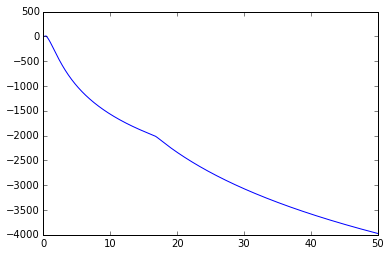

In [86]:
f_GHz = linspace(0.1,50,1000) #GHz, a reasonable unit
f = 1e9*f_GHz   # f in Hz
omega = 2*pi*f  # convert to angular frequency in real units(rad/s)
Z_0 = 50   # line impedance 50 Ohms

R = 1  #reistance of each cell in ohms
C = 10e-12 #capacitance to ground of each cell in farads
L = 0.1e-9 #stray inductance of chip resistor in henries
n = 100  # number of cells

Y_C = 1j*omega*C 
Z_LR = 1j*omega*L + R

ABCD = array( ((1 + Y_C*Z_LR,Z_LR), (Y_C, 1)) )
ABCD = ABCD**n

S21 = 2/(ABCD[0][0] + ABCD[0][1]/Z_0 + ABCD[1][0]*Z_0 + ABCD[1][1])

S21 = 20*log10(abs(S21)) 

plot(f_GHz,S21)